In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('../Datasets/bike_sharing.csv', index_col=0)   
        

In [4]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,spring,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,spring,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,spring,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,spring,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [5]:
data.shape

(731, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null object
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(10), object(2)
memory usage: 97.1+ KB


In [7]:
data.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [8]:
#one hot encoding for season colomn
data = pd.get_dummies(data, columns= ['season'])
data.sample(5)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_fall,season_spring,season_summer,season_winter
551,552,2012-07-05,1,7,0,4,1,1,0.8275,0.761367,0.457917,0.194029,1405,4836,6241,1,0,0,0
395,396,2012-01-31,1,1,0,2,1,1,0.3900,0.381317,0.416667,0.261817,324,4185,4509,0,1,0,0
650,651,2012-10-12,1,10,0,5,1,1,0.4375,0.433071,0.539167,0.235092,1060,6222,7282,0,0,0,1
143,144,2011-05-24,0,5,0,2,1,2,0.6600,0.604813,0.740833,0.207092,659,3833,4492,0,0,1,0
520,521,2012-06-04,1,6,0,1,1,1,0.5975,0.578283,0.487083,0.284833,1071,5927,6998,0,0,1,0


In [9]:
columns = ['registered', 'holiday', 'weekday', 
           'weathersit', 'temp', 'atemp',
           'season_fall', 'season_spring', 
           'season_summer', 'season_winter']


features = data[columns]

In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 10 columns):
registered       731 non-null int64
holiday          731 non-null int64
weekday          731 non-null int64
weathersit       731 non-null int64
temp             731 non-null float64
atemp            731 non-null float64
season_fall      731 non-null uint8
season_spring    731 non-null uint8
season_summer    731 non-null uint8
season_winter    731 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 42.8 KB


In [11]:

labels = data[['cnt']]

In [12]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 1 columns):
cnt    731 non-null int64
dtypes: int64(1)
memory usage: 11.4 KB


In [15]:
#classifiaction models.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [16]:
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [17]:
#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [18]:
#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, x_test, Y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.2)

In [22]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,Y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d
    

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.09241676826243121,
  0.17146524279996314,
  0.09999409010989622,
  0.622360846250281,
  0.1547641035985255]}

In [23]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.092417
1,AdaBoostRegressor,0.171465
2,BaggingRegressor,0.099994
3,SVR,0.622361
4,KNeighborsRegressor,0.154764


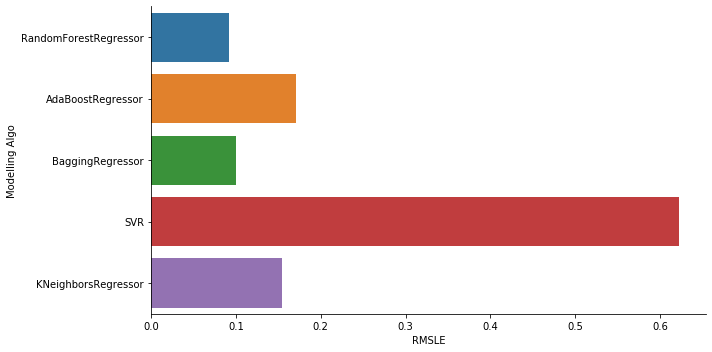

In [26]:
import seaborn as sns
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2);


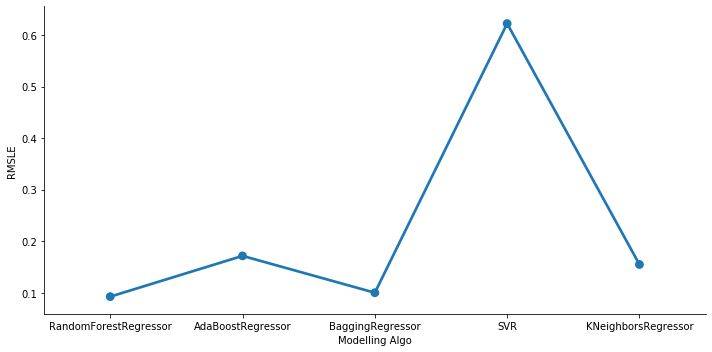

In [27]:
sns.factorplot(x='Modelling Algo',y='RMSLE',data=rmsle_frame,kind='point',size=5,aspect=2)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
lr = LinearRegression().fit(X_train,Y_train)
y_pred = lr.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))  

r2_score: 0.9229147061361069
rmse: 554.6402181242229


In [33]:
dt = DecisionTreeRegressor().fit(X_train,Y_train)
y_pred = dt.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))   

r2_score: 0.9501863950648104
rmse: 445.86109456450504


In [34]:
rf = RandomForestRegressor().fit(X_train,Y_train)
y_pred = rf.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred))) 

r2_score: 0.9770704484747548
rmse: 302.4986021219177


C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
